<h1 align="center">AtliQo Bank Credit Card Launch: Phase 1</h1>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sqlalchemy import create_engine


<h2 align="center"> Import data from Input files <h2>

In [2]:
df_customer = pd.read_csv(r"D:\Ashish\Data Science\AtliQo-Bank-Credit-Card-Launch\Input\customers.csv")
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [3]:
df_transaction = pd.read_csv(r"D:\Ashish\Data Science\AtliQo-Bank-Credit-Card-Launch\Input\transactions.csv")
df_transaction.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [4]:
df_credit_profile = pd.read_csv(r"D:\Ashish\Data Science\AtliQo-Bank-Credit-Card-Launch\Input\credit_profiles.csv")
df_credit_profile.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [5]:
print("Customer DF shape:", df_customer.shape)
print("Transaction DF shape:", df_transaction.shape)
print("Credit Profile DF shape:", df_credit_profile.shape)

Customer DF shape: (1000, 8)
Transaction DF shape: (500000, 7)
Credit Profile DF shape: (1004, 6)


<h2 align="Center"> Data Cleaning: Handle NULL values </h2>

In [6]:
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [7]:
df_customer.loc[df_customer['annual_income'].isnull()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [8]:
mean_annual_income = df_customer['annual_income'].mean()
median_annual_income = df_customer['annual_income'].median()

print("Mean Annual Income:", mean_annual_income)
print("Median Annual Income:", median_annual_income)

Mean Annual Income: 139410.31473684212
Median Annual Income: 112218.5


<h3>We can replace the 0 values with the Mean or Median, but since there are different occupations, we need to calculate and apply the Mean/Median separately for each occupation.</h3>

In [9]:
occupation_wise_median = df_customer.groupby('occupation')['annual_income'].median()
occupation_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

<h3>Use a Lambda Function with apply to Call get_median_value</h3>

In [10]:
df_customer['annual_income'] = df_customer.apply(lambda row: occupation_wise_median[row['occupation']] if pd.isnull(row['annual_income'])
                                                 else row['annual_income'], axis=1)

In [11]:
df_customer.loc[df_customer['annual_income'].isnull()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [12]:
print("Annual income updated successfully.")
# print(df_customer.iloc[14]['annual_income'], df_customer.iloc[82]['annual_income'])
print(df_customer.iloc[[14, 82]]['annual_income'])

Annual income updated successfully.
14    45794.0
82    46759.0
Name: annual_income, dtype: float64


In [13]:
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


<h3> Plot a Histogram of Annual Income </h3>

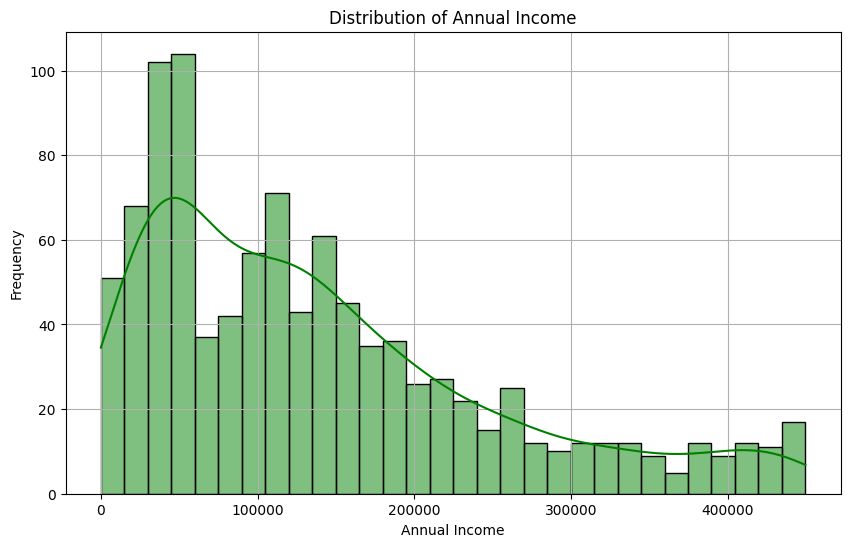

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_customer['annual_income'], bins=30, kde=True, color='green', label='Annual Income')

plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<h2 align="Center"> The annual income shows a right-skewed distribution. </h2>

<h2 align=Center> Exercise: Treat Outliers in Age Column </h2>

<h3> Age is valid only if it is between 15 and 85 years. </h3>

In [15]:
df_customer.loc[(df_customer['age'] < 15) | (df_customer['age'] > 85)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [16]:
occupation_wise_age = df_customer.groupby('occupation')['age'].median()
occupation_wise_age

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [17]:
df_customer['age'] = df_customer.apply(lambda row: occupation_wise_age[row['occupation']] 
                                       if (row['age'] < 15) | (row['age'] > 85) 
                                       else row['age'], axis=1)

In [18]:
df_customer.loc[(df_customer['age'] < 15) | (df_customer['age'] > 85)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [19]:
print(df_customer.iloc[[0, 41]][['occupation','age']])

        occupation   age
0   Business Owner  51.0
41          Artist  26.0


<h2 align=Center> Data Visualization: Age, Gender, Location </h2> 

<h3> Create Age group column [18-25, 26-48. 49-65] </h3>

In [20]:
bin_edge = [17, 25, 48, 65]

bin_labels = ['17-25', '26-48', '49-65']

df_customer['age_group'] = pd.cut(df_customer['age'], bins=bin_edge, labels=bin_labels)

In [21]:
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,17-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,17-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


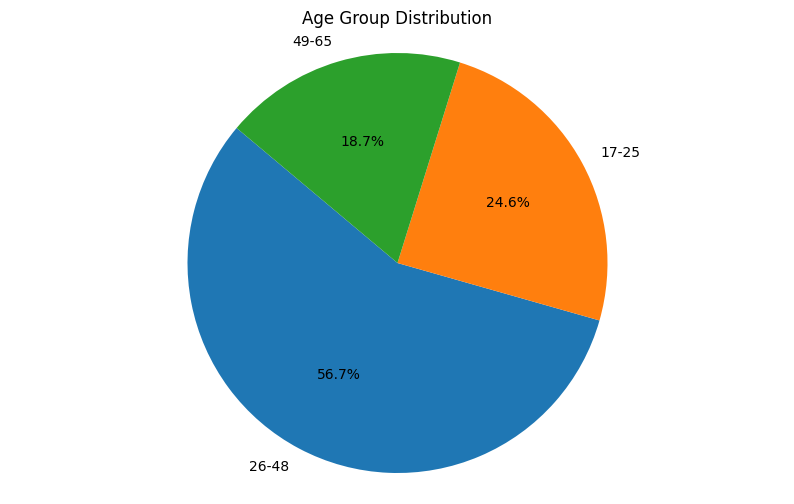

In [22]:
plt.figure(figsize=(10,6))

age_group_count = df_customer['age_group'].value_counts()

plt.pie(age_group_count, labels=age_group_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Group Distribution')
plt.axis('equal')
plt.show()

In [23]:
location_age_group = df_customer.groupby(['location', 'age_group']).size().unstack()
location_age_group

age_group,17-25,26-48,49-65
location,,,
City,172,392,119
Rural,26,46,13
Suburb,48,129,55


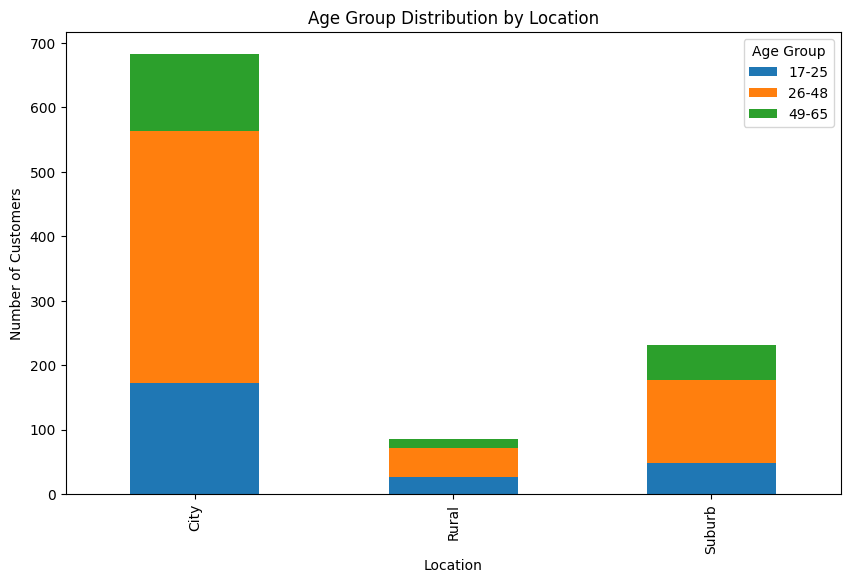

In [24]:
location_age_group.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Age Group Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.legend(title='Age Group')
plt.show()

In [25]:
location_gender_group = df_customer.groupby(['location', 'gender']).size().unstack()
location_gender_group


gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


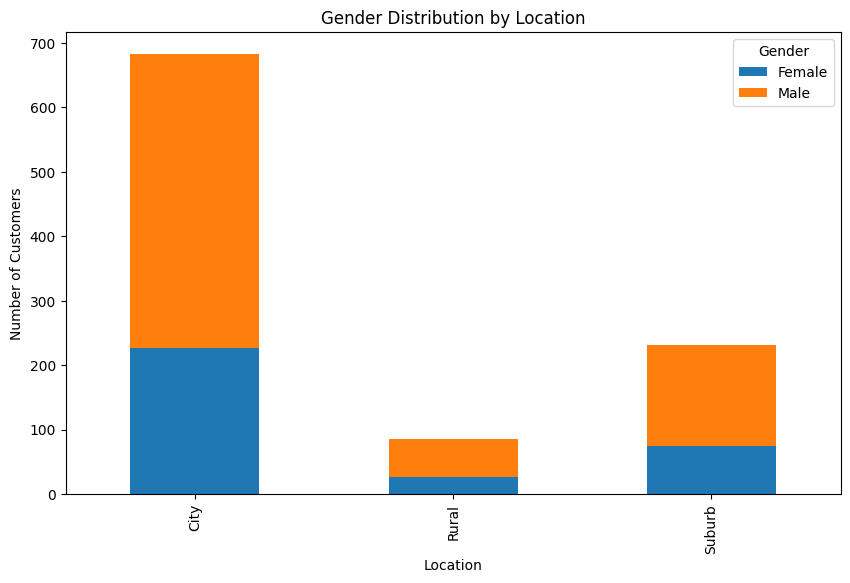

In [26]:
location_gender_group.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Gender Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.show()

<h2 align=Center> Data Cleaning: Credit Score Table - Part 1 </h2>

In [27]:
df_credit_profile.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [28]:
df_credit_profile.shape

(1004, 6)

In [29]:
df_customer.shape

(1000, 9)

<h3>Our input contains 1000 customers, but the credit profiles dataset has 1004 records.</h3>
<h3>This indicates the presence of duplicate records.</h3>

In [30]:
df_credit_profile[df_credit_profile['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [31]:
df_credit_profile = df_credit_profile.drop_duplicates(subset=['cust_id'], keep='last')
df_credit_profile.shape

(1000, 6)

<h2 align=Center> Handel NULL values from Credit profiles Dataset </h2>

In [32]:
df_credit_profile.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [33]:
df_credit_profile[df_credit_profile['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [34]:
df_credit_profile['credit_limit'].value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

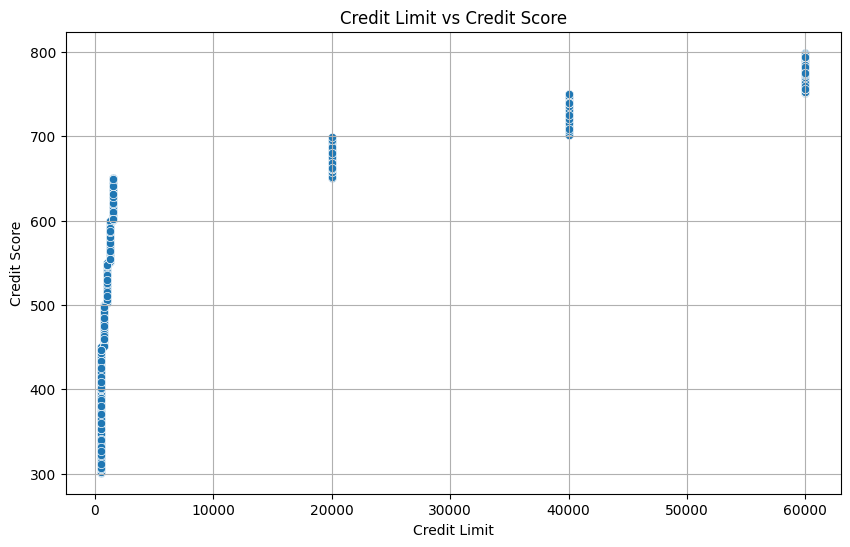

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_credit_profile, x='credit_limit', y='credit_score')
plt.title('Credit Limit vs Credit Score')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

<h3> We observed a range of credit scores, so we are adding a new column to the DataFrame to represent credit score ranges. </h3>

In [36]:
bin_range = [300, 450, 500, 550, 600, 650, 700, 750, 800]

bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_range, bin_range[1:])]

df_credit_profile['credit_score_range'] = pd.cut(df_credit_profile['credit_score'], 
                                                 bins=bin_range, labels=bin_labels, right=False, include_lowest=True)

df_credit_profile.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


<h3> We derived the credit_score_range column and used mode() in groupby to capture the most frequently occurring credit score within each group. </h3>

In [37]:
group_credit_limit_range = df_credit_profile.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0])
group_credit_limit_range

credit_score_range
300-449      500.0
450-499      750.0
500-549     1000.0
550-599     1250.0
600-649     1500.0
650-699    20000.0
700-749    40000.0
750-799    60000.0
Name: credit_limit, dtype: float64

<h3>Replace NULL values in credit_limit with the corresponding group value from credit_score_range</h3>

In [38]:
df_credit_profile['credit_limit'] = df_credit_profile.apply(lambda row: group_credit_limit_range[row['credit_score_range']] 
                                                            if pd.isnull(row['credit_limit']) else row['credit_limit'], axis=1)

In [39]:
df_credit_profile.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
dtype: int64

In [40]:
df_credit_profile[df_credit_profile['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range


<h2 align=center> 
Data Cleaning: Credit Score Table - Part 2 </h2>

In [41]:
df_credit_profile.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000


<h3> The maximum credit_limit is 60,000, while the maximum outstanding_debt is 209,901 </h3>

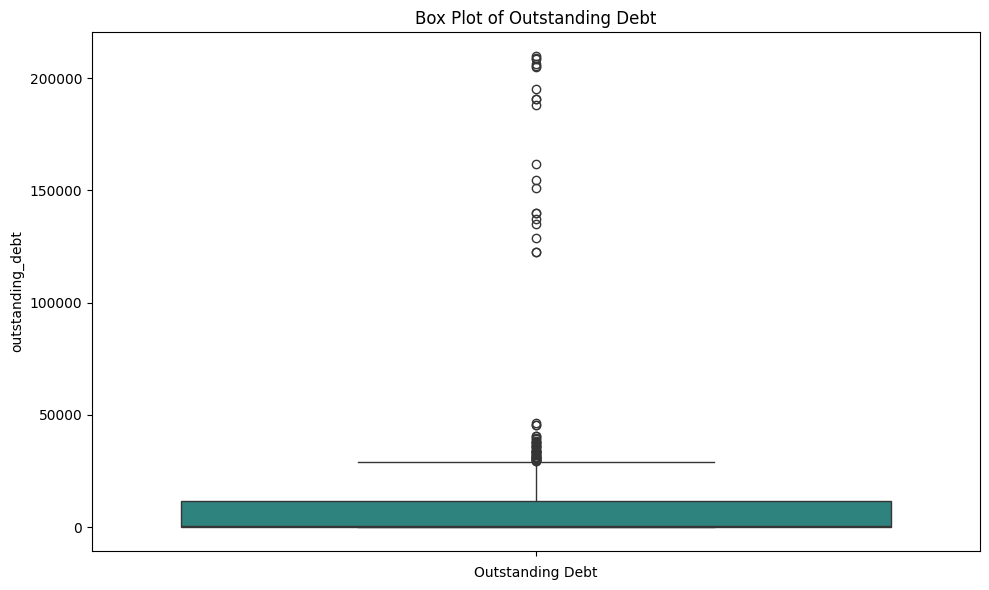

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_credit_profile['outstanding_debt'],palette='viridis')
plt.title('Box Plot of Outstanding Debt')
plt.xlabel('Outstanding Debt')
plt.tight_layout()
plt.show()

<h3> The following are the records where the [outstanding_debt] is greater than the [credit_limit] </h3>

In [43]:
df_credit_profile.loc[df_credit_profile['outstanding_debt'] > df_credit_profile['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
19,20,647,0.439132,205014.0,3.0,1500.0,600-649
25,26,758,0.250811,190838.0,2.0,60000.0,750-799
38,39,734,0.573023,122758.0,3.0,40000.0,700-749
93,94,737,0.739948,137058.0,2.0,40000.0,700-749
204,205,303,0.364360,187849.0,0.0,500.0,300-449
271,272,703,0.446886,154568.0,1.0,40000.0,700-749
301,302,722,0.608076,122402.0,4.0,40000.0,700-749
330,331,799,0.363420,208898.0,4.0,60000.0,750-799
350,351,320,0.285081,150860.0,0.0,500.0,300-449


<h3> Replace outstanding_debt with credit_limit wherever outstanding_debt is greater than credit_limit. </h3>

In [44]:
df_credit_profile.loc[df_credit_profile['outstanding_debt'] > df_credit_profile['credit_limit'], 'outstanding_debt'] = df_credit_profile['credit_limit']

In [45]:
df_credit_profile.loc[df_credit_profile['outstanding_debt'] > df_credit_profile['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range


In [46]:
df_credit_profile.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [47]:
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,17-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,17-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


<h3> Merge df_customer and df_credit_profile using the common field cust_id </h3>

In [48]:
df_mearged = pd.merge(df_customer, df_credit_profile, on='cust_id', how='inner')
df_mearged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,17-25,544,0.854807,513.0,4.0,1000.0,500-549
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,17-25,504,0.336938,224.0,2.0,1000.0,500-549
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749


In [49]:
df_mearged[['credit_score','credit_limit']].corr()

,credit_score,credit_limit
credit_score,1.000000,0.847952
credit_limit,0.847952,1.000000


In [50]:
numeric_coluimns = [
 'annual_income',
 'credit_score',
 'credit_utilisation',
 'outstanding_debt',
 'credit_limit',
 'age']

In [51]:
correlation_matrix = df_mearged[numeric_coluimns].corr()
correlation_matrix

,annual_income,credit_score,credit_utilisation,outstanding_debt,credit_limit,age
annual_income,1.000000,0.564588,-0.092152,0.543430,0.671770,0.609895
credit_score,0.564588,1.000000,-0.070445,0.680654,0.847952,0.444917
credit_utilisation,-0.092152,-0.070445,1.000000,0.192838,-0.080493,-0.027713
outstanding_debt,0.543430,0.680654,0.192838,1.000000,0.810581,0.444301
credit_limit,0.671770,0.847952,-0.080493,0.810581,1.000000,0.510993
age,0.609895,0.444917,-0.027713,0.444301,0.510993,1.000000


<h3> Plot a heatmap to find the correlation of all numeric columns in merged_df </h3>

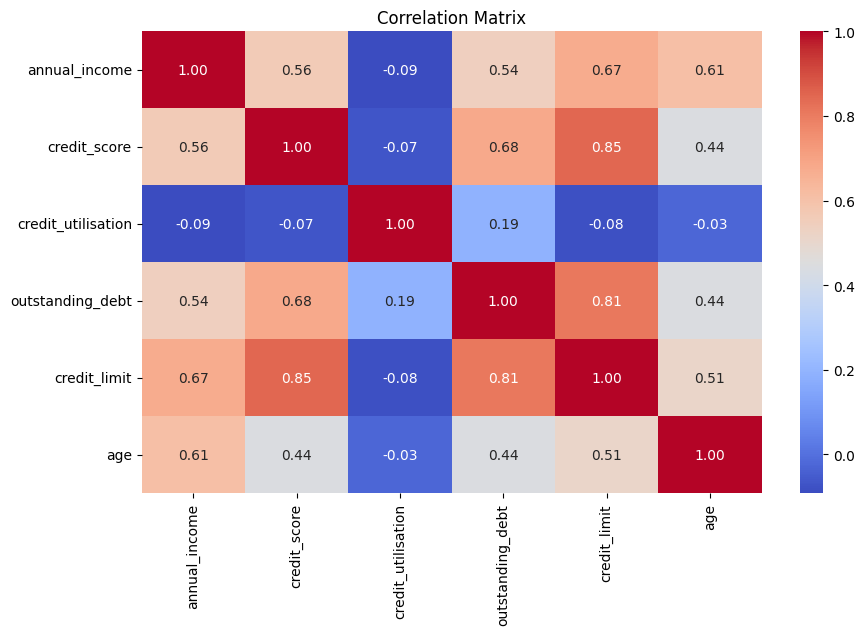

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<h3> Handle NULL value df_transaction </h3>

In [53]:
df_transaction.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [54]:
df_transaction.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [55]:
df_transaction['platform'].value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

In [56]:
df_transaction['platform'].mode()[0]

'Amazon'

<h3> Analyze which platform is used most of the time </h3>

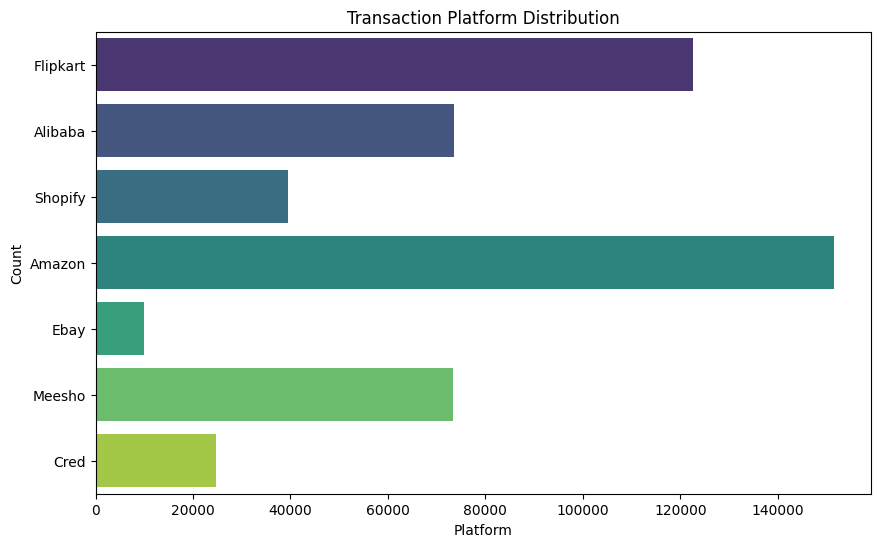

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_transaction['platform'], palette='viridis')
plt.title('Transaction Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

<h3> Transaction Product Category Distribution </h3>

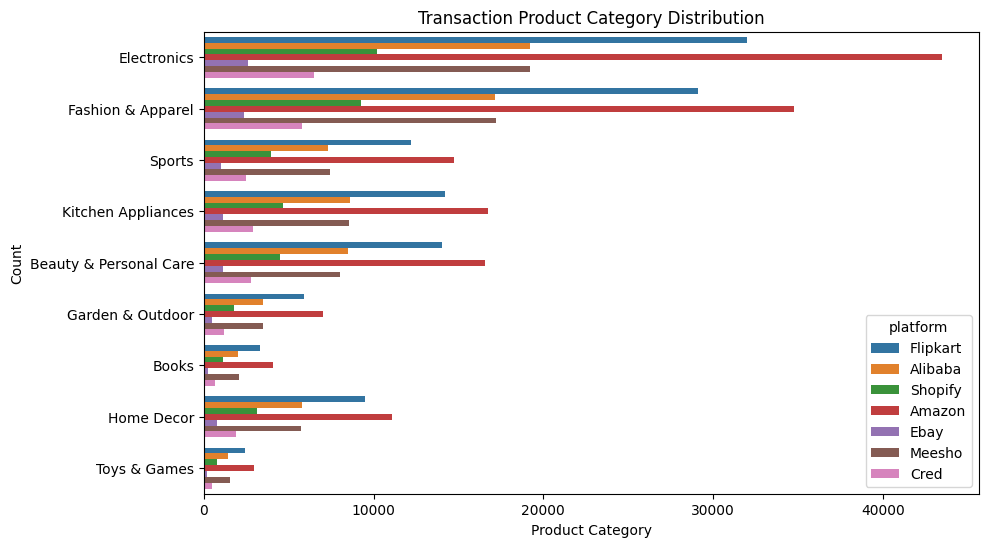

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_transaction, y='product_category', hue='platform')
plt.title('Transaction Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

<h3> From the above visualization, we can see that the Amazon platform is used the most across all product categories. </h3>

In [59]:
df_transaction['platform'].fillna(df_transaction['platform'].mode()[0], inplace=True)

In [60]:
df_transaction.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

<h2 align=center>Data Cleaning: Handling Outliers in Transaction Amount Using IQR</h2>

In [61]:
df_transaction.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [62]:
df_transaction.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


<h3>The minimum tran_amount is 0 and the maximum is 69,999, indicating the presence of outliers in the tran_amount column.</h3>

In [63]:
q1 = df_transaction['tran_amount'].quantile(0.25)
q3 = df_transaction['tran_amount'].quantile(0.75)

print("Q1:", q1)
print("Q3:", q3)

Q1: 64.0
Q3: 397.0


In [64]:
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("IQR:", iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

IQR: 333.0
Lower Bound: -435.5
Upper Bound: 896.5


In [65]:
df_zero_tran_amount = df_transaction[df_transaction['tran_amount'] == 0]
df_zero_tran_amount

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [67]:
df_zero_tran_amount[['platform', 'product_category', 'payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

<h3>Find the median value to replace tran_amount values of 0</h3>

In [68]:
median_to_replace = df_transaction.loc[(df_transaction['platform'] == 'Amazon')
                                       & (df_transaction['product_category'] == 'Electronics')
                                       & (df_transaction['payment_type'] == 'Credit Card')
                                       & (df_transaction['tran_amount'] > 0), 'tran_amount'].median()
median_to_replace

np.float64(554.0)

In [69]:
df_transaction.loc[df_transaction['tran_amount'] == 0, 'tran_amount'] = median_to_replace

In [70]:
df_transaction[df_transaction['tran_amount'] == 0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [71]:
df_transaction.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


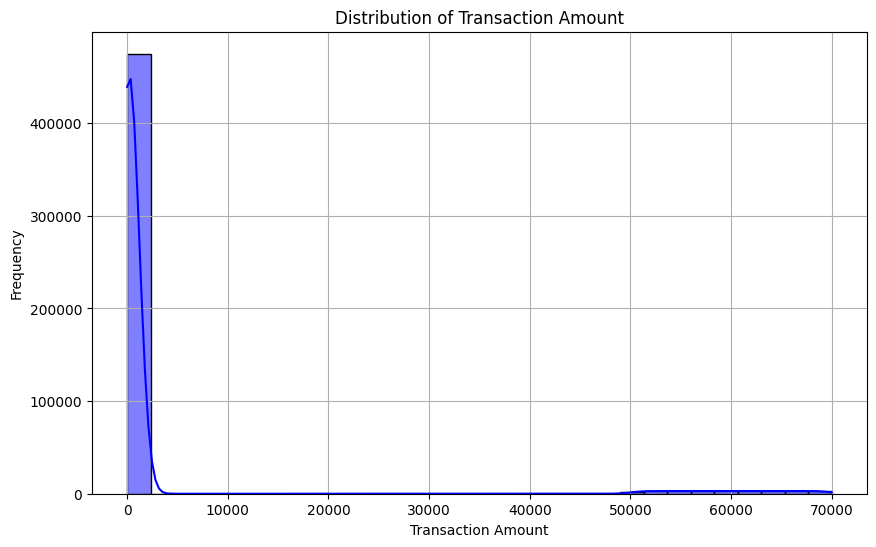

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_transaction['tran_amount'], bins=30, kde=True, color='blue', label='Transaction Amount')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [74]:
print("Q1: ", q1)
print("Q3: ", q3)

Q1:  64.0
Q3:  397.0


In [75]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -435.5
Upper Bound: 896.5


<h3>Set the IQR multiplier to 2 as per the user requirement</h3>

In [76]:
lower_bound = q1 - 2 * iqr
print("Lower Bound with 2*IQR:", lower_bound)
upper_bound = q3 + 2 * iqr
print("Upper Bound with 2*IQR:", upper_bound)

Lower Bound with 2*IQR: -602.0
Upper Bound with 2*IQR: 1063.0


In [78]:
df_valid_transactions = df_transaction[df_transaction['tran_amount'].between(lower_bound, upper_bound)]
df_valid_transactions

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


<h3>Histogram of Valid Transaction Data</h3>

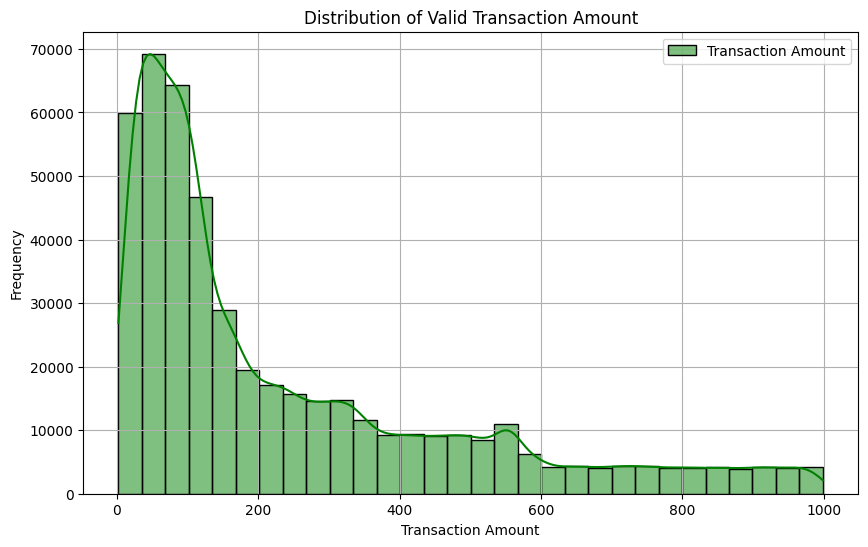

In [80]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_valid_transactions['tran_amount'], bins=30, kde=True, color='green', label='Transaction Amount')
plt.title('Distribution of Valid Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

<h3 align=center>Now handle these outliers using the mean of their respective product categories</h3>

In [81]:
df_transaction.loc[df_transaction['tran_amount'] > upper_bound]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [82]:
valid_product_category_mean = df_valid_transactions.groupby('product_category')['tran_amount'].mean()
valid_product_category_mean

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [83]:
df_transaction['tran_amount'] = df_transaction.apply(lambda row: valid_product_category_mean[row['product_category']]
                                                     if row['tran_amount'] > upper_bound else row['tran_amount'], axis=1)

In [84]:
df_transaction[df_transaction['tran_amount'] > upper_bound]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


<h3>Histogram After Removing Transaction Amount Outliers</h3>

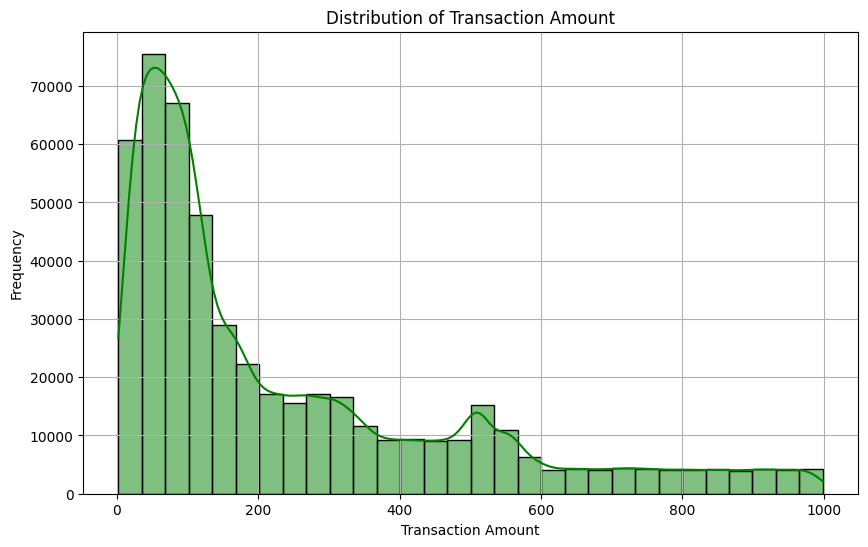

In [85]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_transaction['tran_amount'], bins=30, kde=True, color='green', label='Transaction Amount')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()